# TP ACF effectué par Victor XIE et Pierre LUCIEN pour le 07/11/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from sklearn.preprocessing import StandardScaler
import prince # optionnel

In [ ]:
#Tableau effectifs
Noms = [["Américain","Européen","Japonais"],["Marié","Marié avec enfants","Célibataire","Célibataire avec enfants"]]
T = pd.DataFrame(data=[
    [37,14,51],
    [52,15,44],
    [33,15,63],
    [6,1,8]
], index= Noms[1],columns=Noms[0])
print(T)
#Nous décidons de pas normaliser car toutes les données sont dans le même ordre de grandeurs

                          Américain  Européen  Japonais
Marié                            37        14        51
Marié avec enfants               52        15        44
Célibataire                      33        15        63
Célibataire avec enfants          6         1         8


'#normalisation de la matrice\nT = (Toriginal-Toriginal.mean())/Toriginal.std()\nprint(Toriginal.mean())'

In [3]:
#Matrice Fréquence
total = np.sum(np.sum(T)) #effectif total
F = T/total
print(total)
print(F)

339
                          Américain  Européen  Japonais
Marié                      0.109145  0.041298  0.150442
Marié avec enfants         0.153392  0.044248  0.129794
Célibataire                0.097345  0.044248  0.185841
Célibataire avec enfants   0.017699  0.002950  0.023599


c:\Users\victo\anaconda3new\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [4]:
#Profil ligne
Total_frequ_ligne = np.sum(F.transpose())

Profil_ligne = F.div(Total_frequ_ligne, axis=0) 

#Profil Colonne
Total_frequ_col = np.sum(F, axis=0)  
print(Total_frequ_col[0])
Profil_colonne = F.div(Total_frequ_col, axis=1) 

# Print results
print("Profils colonnes:")
print(Profil_colonne)
print("\nProfils lignes:")
print(Profil_ligne)

0.3775811209439528
Profils colonnes:
                          Américain  Européen  Japonais
Marié                      0.289062  0.311111  0.307229
Marié avec enfants         0.406250  0.333333  0.265060
Célibataire                0.257812  0.333333  0.379518
Célibataire avec enfants   0.046875  0.022222  0.048193

Profils lignes:
                          Américain  Européen  Japonais
Marié                      0.362745  0.137255  0.500000
Marié avec enfants         0.468468  0.135135  0.396396
Célibataire                0.297297  0.135135  0.567568
Célibataire avec enfants   0.400000  0.066667  0.533333


c:\Users\victo\anaconda3new\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\victo\AppData\Local\Temp\ipykernel_44920\3272687984.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(Total_frequ_col[0])


In [5]:
Profil_ligne.transpose().iloc[0]

Marié                       0.362745
Marié avec enfants          0.468468
Célibataire                 0.297297
Célibataire avec enfants    0.400000
Name: Américain, dtype: float64

In [6]:
#Profil Moyen ligne
Profil_moyen=[0,0,0]
for i in range(3):
    Profil_moyen[i]=Profil_ligne.transpose().iloc[i].mean()
print(Profil_moyen)

[0.3821277159512453, 0.11854795972443032, 0.4993243243243243]


In [7]:
#Pour commencer l'AFC on vérifie que les résidus ne sont pas nul
#Indépendance
F0 = pd.DataFrame([[0 for i in range(3)] for i in range(4)])
F0.columns = F.columns
F0.index = F.index
for i in range(4):
    for j in range(3):
        F0.iloc[i, j] = Total_frequ_ligne.iloc[i] * Total_frequ_col.iloc[j]

R = F - F0
print(R)

                          Américain  Européen  Japonais
Marié                     -0.004464  0.001357  0.003106
Marié avec enfants         0.029760  0.000783 -0.030543
Célibataire               -0.026288  0.000783  0.025504
Célibataire avec enfants   0.000992 -0.002924  0.001932


C:\Users\victo\AppData\Local\Temp\ipykernel_44920\2312964543.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.113608478868092' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  F0.iloc[i, j] = Total_frequ_ligne.iloc[i] * Total_frequ_col.iloc[j]
C:\Users\victo\AppData\Local\Temp\ipykernel_44920\2312964543.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03994048085206359' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  F0.iloc[i, j] = Total_frequ_ligne.iloc[i] * Total_frequ_col.iloc[j]
C:\Users\victo\AppData\Local\Temp\ipykernel_44920\2312964543.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.14733599603205683' has dtype incompatible with int64, pl

# La matrice est non nul, on calcul le Xhi2

In [8]:
from scipy import stats

# calc chi2 using existing F0, R, total
x2 = total * ((R**2) / F0).to_numpy().sum()
df = (F.shape[0] - 1) * (F.shape[1] - 1)
p_value = stats.chi2.sf(x2, df)

print(f"Chi2 = {x2:.4f}")
print(f"df = {df}")
print(f"p-value = {p_value:.4e}")

# contributions (%) of each cell to the chi2
contrib = 100 * (total * (R**2) / F0) / x2
print("\nContributions (%) per cell:")
print(contrib)
phi2 = x2/total
print(phi2)

Chi2 = 8.3495
df = 6
p-value = 2.1360e-01

Contributions (%) per cell:
                          Américain  Européen   Japonais
Marié                      0.712141  0.187317   0.265931
Marié avec enfants        29.084420  0.057292  23.622416
Célibataire               22.693927  0.057292  16.471825
Célibataire avec enfants   0.239139  5.909026   0.699275
0.024629718862200264


In [9]:
#Matrice Z
Z = R/np.sqrt(F0)
print(Z)

                          Américain  Européen  Japonais
Marié                     -0.013244  0.006792  0.008093
Marié avec enfants         0.084637  0.003756 -0.076277
Célibataire               -0.074763  0.003756  0.063694
Célibataire avec enfants   0.007675 -0.038149  0.013124


U =
 [[-0.10096361  0.17488931 -0.25955077]
 [ 0.75349453  0.0870016  -0.64197654]
 [-0.64934664  0.10384818 -0.69908685]
 [-0.02003202 -0.97522305 -0.17826131]]
s =
 [1.51215333e-01 4.19957379e-02 5.36408451e-17]
Vh =
 [[ 0.75060995  0.00310588 -0.66073826]
 [-0.24290652  0.93126097 -0.27156846]
 [ 0.6144763   0.36433963  0.69976819]]
Valeurs propres : [2.28660769e-02 1.76364200e-03 2.87734026e-33]
Inerties (%): [9.28393742e+01 7.16062579e+00 1.16823918e-29]


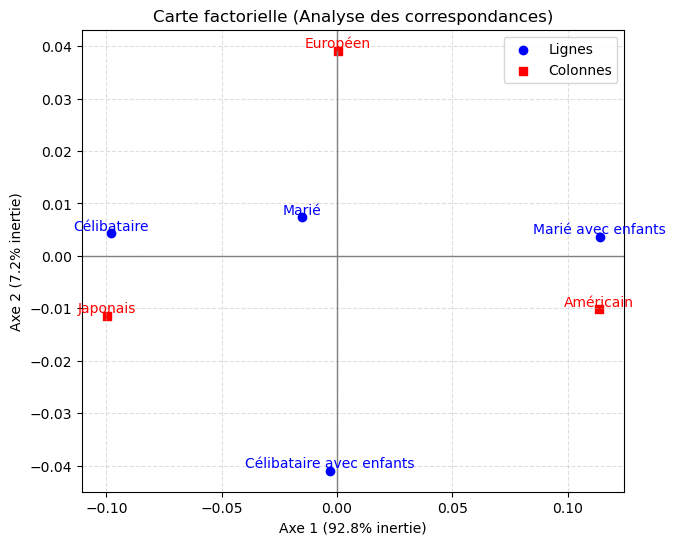

In [10]:
import numpy as np
from scipy import linalg

# 🔸 SVD avec SciPy
U, s, Vh = linalg.svd(Z, full_matrices=False)

print("U =\n", U)
print("s =\n", s)
print("Vh =\n", Vh)

eigenvalues = s**2
inertia = eigenvalues / np.sum(eigenvalues)

print("Valeurs propres :", eigenvalues)
print("Inerties (%):", 100 * inertia)

V = Vh.T

# === 5. Coordonnées factorielles ===
row_coords = U @ np.diag(s)
col_coords = V @ np.diag(s)

# === 6. Tracé de la carte factorielle ===
plt.figure(figsize=(7, 6))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)

# Lignes
plt.scatter(row_coords[:, 0], row_coords[:, 1], c='blue', label='Lignes')
for i, (x, y) in enumerate(row_coords[:, 0:2]):
    plt.text(x, y, f"{Noms[1][i]}", color='blue', ha='center', va='bottom')

# Colonnes
plt.scatter(col_coords[:, 0], col_coords[:, 1], c='red', label='Colonnes', marker='s')
for j, (x, y) in enumerate(col_coords[:, 0:2]):
    plt.text(x, y, f"{Noms[0][j]}", color='red', ha='center', va='bottom')

plt.xlabel(f"Axe 1 ({round(100*s[0]**2/np.sum(s**2), 1)}% inertie)")
plt.ylabel(f"Axe 2 ({round(100*s[1]**2/np.sum(s**2), 1)}% inertie)")
plt.title("Carte factorielle (Analyse des correspondances)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


## Intérprétation des résultats

Association globale : nous avons un phi2 de l'ordre de 0.025 qui est très proche de 0. on sait que l'inertie totale mesure une sorte de "variance" entre les données qui seraient théoriquements indépendantes et celles que l'on observe. Ainsi, on peut en conclure que les lignes et colonnes sont indépendantes.

Proximité avec le profil moyen : Le profil moyen est l'origine sur la carte factorielle. On voit donc ici que les Marié sont proche du profil moyen et que chacun des 3 autres profils lignes y sont écarté selon des préférence pour une colonne, Voiture japonaise pour les Célibataire ou encore Américaine pour les Marié avec enfants.

Qualité de la projection

In [11]:
#Calcul des cos = coord selon l'axe i² / distance à l'origine²
print(col_coords)
mataxe1col = col_coords[:,0]
mataxe2col = col_coords[:,1]
distcol = col_coords[:,1]**2+col_coords[:,0]**2
distrow = row_coords[:,1]**2+row_coords[:,0]**2

mataxe1row = row_coords[:,0]
mataxe2row = row_coords[:,1]
cos1=[]
cos2=[]
for i in range(3):
    cos1.append(round((mataxe1col[i]**2)/(distcol[i]),4))
    cos2.append(round((mataxe2col[i]**2)/(distcol[i]),4))
print("Les cosinus des profils colonnes sur l'axe 1 sont de",cos1, "représentant des angles de",np.arccos(cos1)*180/3.14)
print("Les cosinus des profils colonnes sur l'axe 2 sont de",cos2, "représentant des angles de",np.arccos(cos2)*180/3.14)

cos1=[]
cos2=[]
for i in range(3):
    cos1.append(round((mataxe1row[i]**2)/(distrow[i]),4))
    cos2.append(round((mataxe2row[i]**2)/(distrow[i]),4))
print("Les cosinus des profils lignes sur l'axe 1 sont de",cos1, "représentant des angles de",np.arccos(cos1)*180/3.14)
print("Les cosinus des profils lignes sur l'axe 2 sont de",cos2, "représentant des angles de",np.arccos(cos2)*180/3.14)



[[ 1.13503734e-01 -1.02010387e-02  3.29610279e-17]
 [ 4.69655929e-04  3.91089915e-02  1.95434854e-17]
 [-9.99137565e-02 -1.14047180e-02  3.75361569e-17]]
Les cosinus des profils colonnes sur l'axe 1 sont de [0.992, 0.0001, 0.9871] représentant des angles de [ 7.25592531 90.03991682  9.21766   ]
Les cosinus des profils colonnes sur l'axe 2 sont de [0.008, 0.9999, 0.0129] représentant des angles de [89.58704569  0.81070243 89.30613835]
Les cosinus des profils lignes sur l'axe 1 sont de [0.8121, 0.999, 0.998] représentant des angles de [35.71648927  2.5638585   3.6261458 ]
Les cosinus des profils lignes sur l'axe 2 sont de [0.1879, 0.001, 0.002] représentant des angles de [79.20990015 89.98832446 89.93099955]


Si on se rappelle que la première colonne parle des voitures Américaine et la Troisième des Japonaises, on voit que celle-ci sont très bien expliqué par l'axe 1 avec des cosinue proche de 1 et donc une bonne intérprétabilité.
De même, la colonne Européenne est certes mal représenté par l'axe 1 mais l'est bien par l'axe 2 avec un cosinus de 0.9999.

Contributions aux axes 

In [12]:
#Calcul de contribution à chaque axe
# Calcul de la contribution pour chaque modalité colonne sur l'axe 1
contrib_col_axe1 = (col_coords[:,0] ** 2) / np.sum(col_coords[:,0] ** 2)
print("Contribution des modalités colonne à l'axe 1 :", np.round(contrib_col_axe1,2))

contrib_row_axe1 = (row_coords[:,0] ** 2) / np.sum(row_coords[:,0] ** 2)
print("Contribution des modalités lignes à l'axe 1 :", np.round(contrib_row_axe1,2))


# De même pour l'axe 2
contrib_col_axe2 = (col_coords[:,1] ** 2) / np.sum(col_coords[:,1] ** 2)
print("Contribution des modalités colonne à l'axe 2 :", np.round(contrib_col_axe2,2))

contrib_row_axe2 = (row_coords[:,1] ** 2) / np.sum(row_coords[:,1] ** 2)
print("Contribution des modalités colonne à l'axe 2 :", np.round(contrib_row_axe2,2))

print(T)

Contribution des modalités colonne à l'axe 1 : [0.56 0.   0.44]
Contribution des modalités lignes à l'axe 1 : [0.01 0.57 0.42 0.  ]
Contribution des modalités colonne à l'axe 2 : [0.06 0.87 0.07]
Contribution des modalités colonne à l'axe 2 : [0.03 0.01 0.01 0.95]
                          Américain  Européen  Japonais
Marié                            37        14        51
Marié avec enfants               52        15        44
Célibataire                      33        15        63
Célibataire avec enfants          6         1         8


En rappelant le tableau de base et les contributions par axes par modalités, on en déduit que l'axe 1 a été construit à partir des modalités Américain/Japonais/Marié avec enfants/Célibataires.
L'axe a été construit à partir des modalités Européeen/Célibataire avec enfants.
Cela explique aussi leur très bonne représentation respectivement à ces axes (questions précedentes)

In [13]:
def chi2_distance(profil1, profil2):
    profil1 = np.array(profil1)
    profil2 = np.array(profil2)

    # Calcul des totaux des profils
    total1 = profil1.sum()
    total2 = profil2.sum()

    # Calcul des profils relatifs
    p1 = profil1 / total1
    p2 = profil2 / total2

    # Calcul de la distance chi2 (sans pondération par colonnes)
    dist2 = np.sum((p1 - p2) ** 2)
    return round(dist2,3)

distprofil= []

for i in range(4):
    n = 3
    while n!=i:
        a=Profil_ligne.iloc[i]
        b=Profil_ligne.iloc[n]
        distprofil.append((chi2_distance(a,b),Noms[1][i],Noms[1][n]))
        n-=1
        
print(distprofil)
print("La distance chi2 minimale entre les profils sont", min(distprofil))


[(0.007, 'Marié', 'Célibataire avec enfants'), (0.009, 'Marié', 'Célibataire'), (0.022, 'Marié', 'Marié avec enfants'), (0.028, 'Marié avec enfants', 'Célibataire avec enfants'), (0.059, 'Marié avec enfants', 'Célibataire'), (0.016, 'Célibataire', 'Célibataire avec enfants')]
La distance chi2 minimale entre les profils sont (0.007, 'Marié', 'Célibataire avec enfants')


Comparaison de profils :

Les profils les plus similaires sont les Marié et les Célibataires avec enfants cela se voit sur la carte factorielle car ils sont très peu séparé au niveau de l'axe 1 qui à 92% d'inertie ce qui n'est pas le cas entre ces deux modalités et les deux autres.